# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [6]:
test.isnull().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [7]:
train['keyword'].fillna("", inplace=True)
test['keyword'].fillna("", inplace=True)

In [8]:
train['location'].fillna("", inplace=True)
test['location'].fillna("", inplace=True)

In [9]:
train.isnull().any(), test.isnull().any()

(id          False
 keyword     False
 location    False
 text        False
 target      False
 dtype: bool,
 id          False
 keyword     False
 location    False
 text        False
 target      False
 dtype: bool)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


<AxesSubplot:xlabel='target', ylabel='Count'>

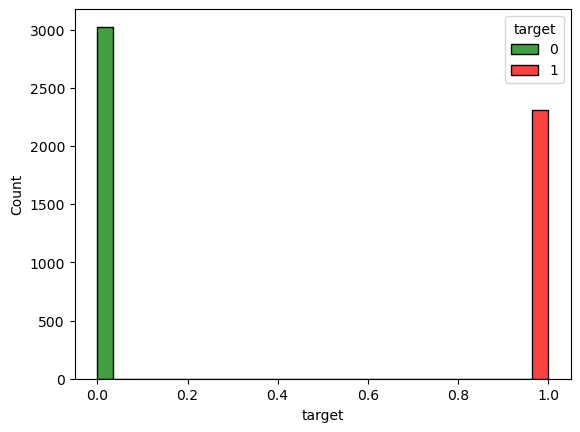

In [10]:
sns.histplot(train, x='target',hue='target', discrete = False, multiple="dodge", palette=['green', 'red'])

In [11]:
(train[train.target == 1].target.count(),train[train.target == 0].target.count())

(2305, 3024)

In [12]:
train[train.target == 0].target.count()/train[train.target == 1].target.count()

1.3119305856832972

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [13]:
pop = train.keyword.value_counts().to_frame()
pop.reset_index(inplace=True)
np=list(pop['index'])
np

['',
 'damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami',
 'fatality',
 'emergency',
 'nuclear%20reactor',
 'twister',
 'harm',
 'bombed',
 'bloody',
 'fatal',
 'stretcher',
 'weapon',
 'engulfed',
 'flames',
 'collision',
 'blizzard',
 'rioting',
 'danger',
 'upheaval',
 'whirlwind',
 'devastation',
 'ruin',
 'airplane%20accident',
 'windstorm',
 'thunder',
 'forest%20fires',
 'typhoon',
 'deaths',
 'buildings%20on%20fire',
 'evacuate',
 'screams',
 'electrocute',
 'hostages',
 'armageddon',
 'explosion',
 'panic',
 'explode',
 'fire',
 'screaming',
 'injuries',
 'outbreak',
 'blaze',
 'nuclear%20disaster',
 'inundated',
 'sinkhole',
 'famine',
 'trouble',
 'burned',
 'demolition',
 'traumatised',
 'razed',
 'pandemonium',
 'collapsed',
 'tragedy',
 'emergency%20services',
 'derailed',
 'catastrophe',
 'bleeding',
 'loud%20bang',
 'collide',
 'rescuers',
 'derailment',
 'hazard',
 'mudslide',
 'sandstorm',
 'burning%20buildings',
 'd

In [14]:
popular_keywords = np[1:11]
popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami',
 'fatality']

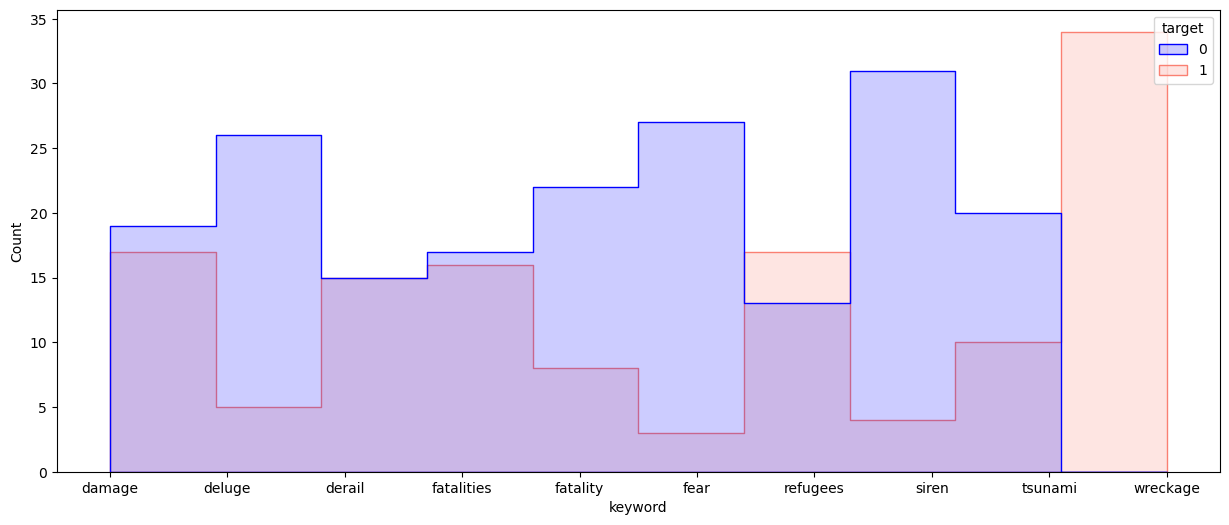

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=train[train.keyword.isin(popular_keywords)],
             x='keyword', hue=train['target'], multiple='layer',
             discrete=False, palette=['blue', 'salmon'], alpha=0.2, element='step')

plt.show()

**Выводы**: Класса 0 в обучающей выборке больше, чем 1, то есть больше всего твитов о нереальных проишествиях. Если ключевым словом являлось крушение (wreckage), то ложный твитов не было, в deluge, fear, siren, fatality меньше всего встречалось правдивых твитов, а у derail - одинаково и тех, и других.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [16]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [17]:
train_new = train.drop(columns='id')
train_new

,keyword,location,text,target
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,rioting,,Still rioting in a couple of hours left until ...,1
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...
5226,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,panic,,just had a panic attack bc I don't have enough...,0
860,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,,,Officials say a quarantine is in place at an A...,1


In [18]:
train_new.text = train_new[['keyword', 'location', 'text']].apply(" ".join, axis=1)
train_new.loc[[6590, 7122, 2769]]

,keyword,location,text,target
6590,survivors,"Marietta, GA","survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm,,violent%20storm If you were the NWS wth a rot...,1
2769,devastation,Atlanta g.a.,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [19]:
train_new.drop(columns=['keyword', 'location'], inplace=True)

In [20]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [21]:
test_new = test.drop(columns='id')
test_new.text = test_new[['keyword', 'location', 'text']].apply(" ".join, axis=1)
test_new.drop(columns=['keyword', 'location'], inplace=True)
test_new

,text,target
2644,destruction So you have a new weapon that can...,1
2227,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,police UK DT @georgegalloway: RT @Galloway4May...,1
132,aftershock Aftershock back to school kick off...,0
6845,"trauma Montgomery County, MD in response to tr...",0
...,...,...
4307,"hellfire 570 Vanderbilt; Brooklyn, NY New cock...",0
3375,evacuation USA Bend Post Office roofers cut ga...,1
1710,collided Monsoon flooding - Monsoon rains hav...,1
4898,massacre Ireland Remember this was a massacre ...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
vect_train = cnt_vec.fit_transform(train_new.text)

In [23]:
#размер матрицы
vect_train.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [24]:
cnt_vec.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [25]:
import string

In [26]:
def contains_digit(s: str) -> bool:
    for i in s:
        if i.isdigit():
            return True
    return False

def contains_punctuation(s: str) -> bool:
    for i in s:
        if i in string.punctuation:
            return True
    return False

def is_hashtag(s: str) -> bool:
    if s[0] == '#':
        return True
    return False

def is_mention(s: str) -> bool:
    if s[0] == '@':
        return True
    return False
def investigate_vocabulary(vocabulary):
    digits = 0
    punct = 0
    hashtags = 0
    mentions = 0
    for i in vocabulary.keys():
        if contains_digit(i):
            digits += 1
        if contains_punctuation(i):
            punct += 1
        if is_hashtag(i):
            hashtags += 1
        if is_mention(i):
             mentions += 1
            
    print('With digit:      ', digits
          )
    print('With punctuation:', punct
          )
    print('Hashtags:        ', hashtags
          )
    print('Mentions:        ', mentions
          )




In [27]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [28]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [29]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(nltk.tokenize.api.TokenizerI)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0)
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3'
 |      , 'and', 'some', 'arrows', '<', '>', '->', '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Method resolution order:
 |      TweetTokenizer
 |      nltk.toke

In [30]:
twt_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
vec_twt_train = twt_vec.fit_transform(train_new.text)
twt_vec.vocabulary_

{'bridge': 5275,
 '%': 1472,
 '20collapse': 1800,
 'ashes': 4530,
 '2015': 1773,
 ':': 2229,
 'australia': 4628,
 '\x89': 19587,
 'ûªs': 19640,
 'collapse': 6032,
 'at': 4567,
 'trent': 18450,
 'among': 4300,
 'worst': 19368,
 'in': 12552,
 'history': 8949,
 'england': 7415,
 'bundled': 5388,
 'out': 14999,
 'for': 8041,
 '60': 2077,
 '...': 1512,
 'http://t.co/t5trhjuau0': 11456,
 'hail': 8661,
 'carol': 5600,
 'stream': 17648,
 ',': 1483,
 'illinois': 12503,
 'great': 8518,
 'michigan': 14071,
 'technique': 18025,
 'camp': 5510,
 'b1g': 4691,
 'thanks': 18124,
 'to': 18284,
 '@bmurph1019': 2490,
 '@hail_youtsey': 2905,
 '.': 1509,
 '@termn8r13': 3718,
 '#goblue': 520,
 '#wrestleon': 1442,
 'http://t.co/oaskgki6qj': 10996,
 'police': 15494,
 'houston': 9082,
 'cnn': 5982,
 'tennessee': 18063,
 'movie': 14348,
 'theater': 18131,
 'shooting': 17007,
 'suspect': 17851,
 'killed': 13124,
 'by': 5442,
 'http://t.co/di8elzswnr': 9897,
 'rioting': 16377,
 'still': 17597,
 'a': 3943,
 'couple

In [31]:
investigate_vocabulary(twt_vec.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** благодаря данному токенайзеру нам удалось найти уже не 0 хэштэгов и упоминаний, помимо этого он лучше выделяет слова с пунктуацией в составе и появилось больше слов с цифрами в составе, из чего можно сделать вывод, что он лучше делит на токены и словарь становитя обширнее.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [32]:
import nltk
#nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

In [33]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    for i in s:
        if i not in string.ascii_letters:
            return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    flag = False
    for i in s:
        if i not in string.punctuation:
            return False
        if i == ')' or i == '(':
            flag = True
    if flag:
        return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if s[0] == '#':
        for i in range(1, len(s)):
            if s[i] not in string.ascii_letters:
                return False
        return True
    return False

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    s = s.lower()
    tokenizer = TweetTokenizer()
    txt = tokenizer.tokenize(s)
    new = list()
    for token in txt:
        if (contains_only_latin_letters(token) or is_emoji(token) or is_hashtag(token)) and token not in nltk.corpus.stopwords.words('english'):
            new.append(token)
    stemmer = SnowballStemmer('english')
    tokens_ans = list()
    for i in new:
        tokens_ans.append(stemmer.stem(i))
    return tokens_ans

In [34]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [35]:
for cur in list(train_new.iloc[:10].text):
    print(cur, custom_tokenizer(cur))

bridge%20collapse  Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0 ['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj ['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR ['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
rioting  Still rioting in a couple of hours left until I have to be up for class. ['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
wounds Lake Highlands Crack in the path where I wiped out this morning during beach run. Surface wounds on left e

In [36]:
dfres = train_new.iloc[:10]
dfres['customized'] = dfres['text'].apply(lambda x: custom_tokenizer(x))
dfres

/var/folders/d7/b7q9cw5d159ct6_lmr4sd5k40000gn/T/ipykernel_1378/3137888686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfres['customized'] = dfres['text'].apply(lambda x: custom_tokenizer(x))


,text,target,customized
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0,"[bridg, ash, australia, collaps, trent, bridg,..."
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1,"[hail, carol, stream, illinoi, great, michigan..."
5461,police Houston CNN: Tennessee movie theater s...,1,"[polic, houston, cnn, tennesse, movi, theater,..."
5787,rioting Still rioting in a couple of hours le...,1,"[riot, still, riot, coupl, hour, left, class]"
7445,wounds Lake Highlands Crack in the path where ...,0,"[wound, lake, highland, crack, path, wipe, mor..."
151,airplane%20accident Somewhere Out There Expert...,1,"[airplan, somewher, expert, franc, begin, exam..."
915,bloody Isolated City In World Perth 'I came to...,1,"[bloodi, isol, citi, world, perth, came, kill,..."
1305,burning @JohnsonTionne except idk them?? it's...,0,"[burn, except, idk, realli, burn]"
2570,destroy he/him or she/her (ask) destroy the house,0,"[destroy, (, ask, ), destroy, hous]"
7399,"wounded Maracay y Nirgua, Venezuela Police Off...",1,"[wound, maracay, nirgua, venezuela, polic, off..."


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_train = train_new['text'].copy()
y_train = train_new['target'].copy()
X_test = test_new['text'].copy()
y_test = test_new['target'].copy()
X_train

1186    bridge%20collapse  Ashes 2015: AustraliaÛªs c...
4071    hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461    police Houston  CNN: Tennessee movie theater s...
5787    rioting  Still rioting in a couple of hours le...
7445    wounds Lake Highlands Crack in the path where ...
                              ...                        
5226    obliteration Merica! @Eganator2000 There aren'...
5390    panic  just had a panic attack bc I don't have...
860     blood  Omron HEM-712C Automatic Blood Pressure...
7603      Officials say a quarantine is in place at an...
7270    whirlwind Stamford & Cork (& Shropshire) I mov...
Name: text, Length: 5329, dtype: object

In [39]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

In [40]:
bow = vectorizer.fit_transform(X_train)
bow

<5329x10482 sparse matrix of type '<class 'numpy.int64'>'
	with 50974 stored elements in Compressed Sparse Row format>

In [41]:
bow_test = vectorizer.transform(X_test)
bow_test

<2284x10482 sparse matrix of type '<class 'numpy.int64'>'
	with 19288 stored elements in Compressed Sparse Row format>

2. Обучите LogisticRegression на полученных признаках.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [43]:
y_pred = clf.predict(bow_test)

3. Посчитайте метрику f1-score на тестовых данных.

In [44]:
#без нормировки
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.752953813104189

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.73      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [46]:
#с нормировкой
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)
clf.fit(bow, y_train)
y_pred = clf.predict(bow_test)
f1_score(y_test, y_pred)

0.7440310938367575

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
vec = TfidfVectorizer(tokenizer=custom_tokenizer)
vec_train = vec.fit_transform(X_train)
vec_test = vec.transform(X_test)
vec_train, vec_test

(<5329x10482 sparse matrix of type '<class 'numpy.float64'>'
 	with 50974 stored elements in Compressed Sparse Row format>,
 <2284x10482 sparse matrix of type '<class 'numpy.float64'>'
 	with 19288 stored elements in Compressed Sparse Row format>)

In [48]:
#без нормировки
clf.fit(vec_train, y_train)
y_pred_tf = clf.predict(vec_test)

In [49]:
f1_score(y_test, y_pred_tf)

0.7422222222222221

In [50]:
#с нормировкой
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

In [51]:
clf.fit(vec_train, y_train)
y_pred_tf = clf.predict(vec_test)

In [52]:
f1_score(y_test, y_pred_tf)

0.7457811649428416

In [53]:
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.80      0.79      2284



1. **Ответ:**  Если рассматривать нормированные с помощью MaxAbsScaler-а данные, то характеристики даже немного улучшаются и становятся ближе к 0.75. Если же не нормировать наши данные, то есть небольшое ухудшение.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [54]:
# 2
vec1 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df = 0.9)
vec1_train = vec1.fit_transform(X_train)
vec1_test = vec1.transform(X_test)
vec1_train, vec1_test

(<5329x10482 sparse matrix of type '<class 'numpy.float64'>'
 	with 50974 stored elements in Compressed Sparse Row format>,
 <2284x10482 sparse matrix of type '<class 'numpy.float64'>'
 	with 19288 stored elements in Compressed Sparse Row format>)

In [55]:
#без нормировки
clf.fit(vec1_train, y_train)
y_pred_tf1 = clf.predict(vec1_test)
f1_score(y_test, y_pred_tf1)

0.7422222222222221

In [56]:
vec1_train = scaler.fit_transform(vec1_train)
vec1_test = scaler.transform(vec1_test)

In [57]:
clf.fit(vec1_train, y_train)
y_pred_tf1 = clf.predict(vec1_test)

In [58]:
#с нормировкой
f1_score(y_test, y_pred_tf1)

0.7457811649428416

In [59]:
print(classification_report(y_test, y_pred_tf1))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.80      0.79      2284



2. **Ответ:** По сравнению с предыдущими значениями не изменились ни размеры матрицы, ни метрики, из чего можно сделать вывод, что близких к 1 значений df не было или было существенно мало.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [60]:
# 3 без нормировки
for i in range(5):
    vecn = TfidfVectorizer(tokenizer=custom_tokenizer, max_df = 0.9, min_df = i /1000)
    vecn_train = vecn.fit_transform(X_train)
    vecn_test = vecn.transform(X_test)
    clf.fit(vecn_train, y_train)
    y_pred_tfn = clf.predict(vecn_test)
    print(f1_score(y_test, y_pred_tfn))
    

0.7422222222222221
0.7449259462424574
0.7314410480349345
0.7258855585831063
0.7209554831704669


In [61]:
# с нормировкой
for i in range(5):
    vecn = TfidfVectorizer(tokenizer=custom_tokenizer, max_df = 0.9, min_df = i /1000)
    vecn_train = vecn.fit_transform(X_train)
    vecn_test = vecn.transform(X_test)
    vecn_train = scaler.fit_transform(vecn_train)
    vecn_test = scaler.transform(vecn_test)
    clf.fit(vecn_train, y_train)
    y_pred_tfn = clf.predict(vecn_test)
    print(f1_score(y_test, y_pred_tfn))

0.7457811649428416
0.745119305856833
0.7386797599563558
0.7226798462383306
0.7160762942779292


In [62]:
#без нормировки
for i in range(6):
    vec2 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = i / 100, max_df = 0.9)
    vec2_train = vec2.fit_transform(X_train)
    vec2_test = vec2.transform(X_test)
    clf.fit(vec2_train, y_train)
    y_pred_tf2 = clf.predict(vec2_test)
    print(f1_score(y_test, y_pred_tf2))

0.7422222222222221
0.6288361320208454
0.4056463595839524
0.2903752039151713
0.1359773371104816
0.0


In [63]:
#с нормировкой
for i in range(6):
    vec2 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = i / 100, max_df = 0.9)
    vec2_train = vec2.fit_transform(X_train)
    vec2_test = vec2.transform(X_test)
    vec2_train = scaler.fit_transform(vec2_train)
    vec2_test = scaler.transform(vec2_test)
    clf.fit(vec2_train, y_train)
    y_pred_tf2 = clf.predict(vec2_test)
    print(f1_score(y_test, y_pred_tf2))

0.7457811649428416
0.6273148148148148
0.4056463595839524
0.2903752039151713
0.1359773371104816
0.0


In [64]:
#с нормировкой
vec3 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = 0.001, max_df = 0.9)
vec3_train = vec3.fit_transform(X_train)
vec3_test = vec3.transform(X_test)
clf.fit(vec3_train, y_train)
y_pred_tf3 = clf.predict(vec3_test)
print(f1_score(y_test, y_pred_tf3))

0.7449259462424574


In [65]:
#без нормировки
vec3 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = 0.001, max_df = 0.9)
vec3_train = vec3.fit_transform(X_train)
vec3_test = vec3.transform(X_test)
vec3_train = scaler.fit_transform(vec3_train)
vec3_test = scaler.transform(vec3_test)
clf.fit(vec3_train, y_train)
y_pred_tf3 = clf.predict(vec3_test)
print(f1_score(y_test, y_pred_tf3))

0.745119305856833


3. **Ответ:** В обоих случаях при увеличении значений min_df до 0.05 выходит, что f1 становится равным 0, а для данных без нормировки у нас есть улучшение при min_df=0.001, но нет улучшений по сравнению с самой первой моделью. Для нормированных данных же выходит, что при 0.001 метрика качества уже чуть уменьшается, но все равно еще лучше по сравнению с моделью из номера 8.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [66]:
#без нормировки
from sklearn.feature_extraction.text import HashingVectorizer
vec_hash = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000, token_pattern = None)
bow_hash = vec_hash.fit_transform(X_train)
hash_test = vec_hash.transform(X_test)
clf.fit(bow_hash, y_train)
y_pred_hash = clf.predict(hash_test)
print(f1_score(y_test, y_pred_hash))
print('F1 score:', f1_score(y_test, y_pred_hash))

0.7190635451505016
F1 score: 0.7190635451505016


In [67]:
#с нормировкой
from sklearn.feature_extraction.text import HashingVectorizer
vec_hash = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000, token_pattern = None)
bow_hash = vec_hash.fit_transform(X_train)
hash_test = vec_hash.transform(X_test)
bow_hash = scaler.fit_transform(bow_hash)
hash_test = scaler.transform(hash_test)
clf.fit(bow_hash, y_train)
y_pred_hash = clf.predict(hash_test)
print(f1_score(y_test, y_pred_hash))
print('F1 score:', f1_score(y_test, y_pred_hash))

0.7329729729729729
F1 score: 0.7329729729729729


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Самый высокий резлультат на ненормированных данных показал первый вариант с CountVectorizer-ом, а на нормированных - Tf-idf векторизатором, причем оба стремятся к 0.75, а также при HashingVectorizer-ре в обоих случаях получились самые худшие значения метрики.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [68]:
tf = CountVectorizer(tokenizer=custom_tokenizer, max_df = 0.9, min_df=0.001)
t_train = tf.fit_transform(X_train)
t_test = tf.transform(X_test)
t_train = scaler.fit_transform(t_train)
t_test = scaler.transform(t_test)
clf.fit(t_train, y_train)
y_pred_t = clf.predict(t_test)
print(f1_score(y_test, y_pred_t))

0.7476635514018691


**Примерно 0.75 и ближе всего для нормализованных данных, а так мы добились чуть большего чем 0.75 f1 в 7 номере для неотнормированных данных.**